### Tags

- Multiclass Classification
- Numeric Data analysis
- Seaborn Basics
- Decision Tree, Random Forest Tree, SVM
- Convolution matrix to undertand the result of classification
- Accuracy, Precision, Recall and F1 Score
- Tensorflow - Keras - Multiclass classification
- Validation graph vs traning graph
- Simple data normalization and manipulation using Sklearn

In [37]:
import pandas as pd
import pandas_profiling as pp
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import tkinter
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [2]:
data = pd.read_csv("data/red-wine/winequality-red.csv")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
pp.ProfileReport(data)

C:\Users\Antarika Baruah\Anaconda3\envs\Tensorflow-py3.7\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,12
Number of observations,1599
Total Missing (%),0.0%
Total size in memory,150.0 KiB
Average record size in memory,96.1 B
Numeric,12
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [6]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

### Data Initial Understadning

- all the features are numeric value.
- since features are numeric , they can be normalized. (Normalized data converge faster and better)
- number of examples are not very large, only 1599 rows. (Simple machine learning algo can be enough)
- number of features are not very large, so need for dimensionality resunction. (No need of PCA kind of data conversion)
- no null values are present , so no pre processing required for filling null values.
- based on the correlation diagram 
    - sulphate, alcohol, and citric acid most closely related to wine quality in negative relation
    - volatile acidity, chloride, total sulphur dioxide, density related to wine quality in positive relation.
    

### Data Visualization

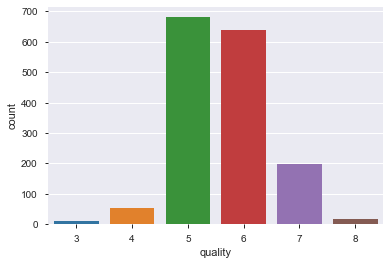

In [7]:
# Distribution of wine quality
# inline is required for placing the graph in motebook itself
%matplotlib inline

sns.countplot(x="quality", data=data)

### Label Engineering Analysis
- there are 6 lable in total
- value mostly concentrated for 5 and 6
- since the number of examples are very less, and quality value varies from 1 - 10. we will convert quality in different bucket.
    - 1-4 : bucket 0 [bad]
    - 5-7 : bucket 1 [ok]
    - above 7 : bucket 2 [good]

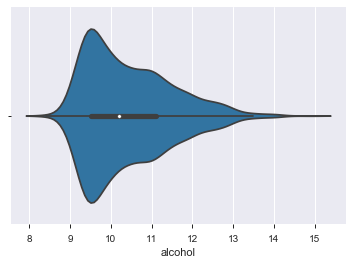

In [8]:
# alchol value - wine quality
sns.violinplot(x=data["alcohol"])

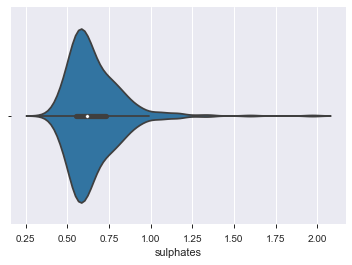

In [9]:
sns.violinplot(x=data["sulphates"])


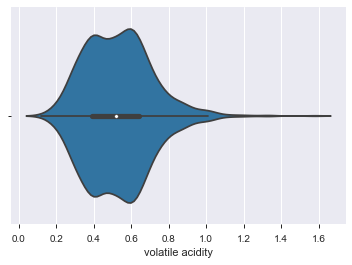

In [10]:
sns.violinplot(x=data["volatile acidity"])


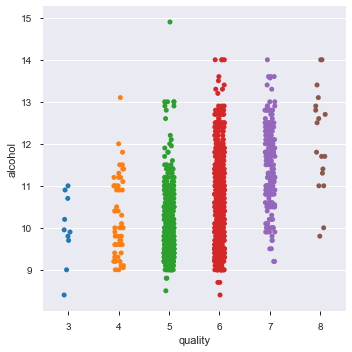

In [11]:
sns.catplot(x="quality",y="alcohol",data=data)

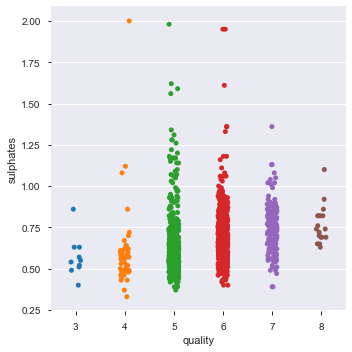

In [12]:
sns.catplot(x="quality",y="sulphates",data=data)

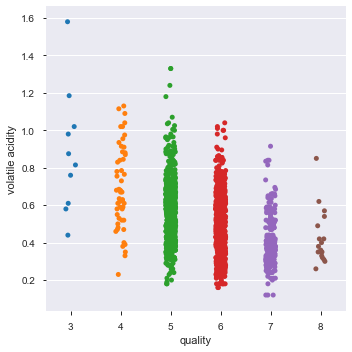

In [13]:
sns.catplot(x="quality",y="volatile acidity",data=data)

### Feature Engineering
- shuffle the data 
- bucketize the label into new buckets.
- finalized the features columns and labels.
- normalize the feature columns
- deivide the dataset in training and validation set.
- analyse the input feature dimension.

In [14]:
bins=[0,4,6,10]
labels=[0,1,2]
data['wine_quality']=pd.cut(data['quality'],bins=bins,labels=labels)

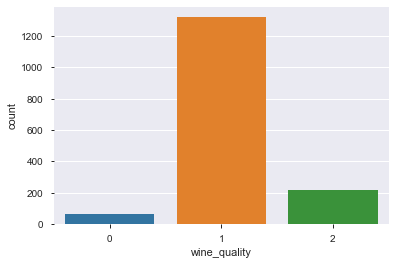

In [15]:
sns.countplot(x="wine_quality", data=data)

In [16]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_quality'],
      dtype='object')

In [17]:
# Bucketization of labels
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'] 
label = ['wine_quality']

In [18]:
data = shuffle(data)
X = data[features]
y = data[label]

In [19]:
 X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [20]:
print('Training Feature Shape', X_train.shape)
print('Validation Feature Shape', X_val.shape)

print('Label Training Shape', y_train.shape)
print('Label Validation Shape', y_val.shape)

Training Feature Shape (1279, 11)
Validation Feature Shape (320, 11)
Label Training Shape (1279, 1)
Label Validation Shape (320, 1)


In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [22]:
print('Training Feature Shape', X_train.shape)
print('Validation Feature Shape', X_val.shape)

Training Feature Shape (1279, 11)
Validation Feature Shape (320, 11)


(1279, 1)

### Machine Learning Alorithm Comparision
- State Vector Machine
- Decision Tree
- Random Forest Tree
- Simple Neural Network Using Tensorflow and Keras. [Deep Learning]

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 


In [24]:
model = SVC()
param = {
    'kernel':['rbf'],
    'C':[1,5,10,15, 20],
    'coef0':[0.001, 0.01,0.1, 0.5, 1]
}

In [25]:
%%time
gsc = GridSearchCV(
        estimator=model,
        param_grid=param,
        cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
grid_result = gsc.fit(X_train, y_train)
print('Best Param', grid_result.best_params_)

Best Param {'C': 5, 'coef0': 0.001, 'kernel': 'rbf'}
Wall time: 3.7 s


C:\Users\Antarika Baruah\Anaconda3\envs\Tensorflow-py3.7\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
y_pred = grid_result.best_estimator_.predict(X_val)

In [27]:
print(y_pred.shape)
print('Accuracy', accuracy_score(y_val, y_pred))
print("classification Report:\n",classification_report(y_val,y_pred))
print('Confusion Matrix \n' , confusion_matrix(y_val, y_pred))

(320,)
Accuracy 0.828125
classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.85      0.96      0.90       261
           2       0.60      0.38      0.46        40

    accuracy                           0.83       320
   macro avg       0.48      0.44      0.45       320
weighted avg       0.77      0.83      0.79       320

Confusion Matrix 
 [[  0  18   1]
 [  2 250   9]
 [  0  25  15]]


In [28]:
model = DecisionTreeClassifier()
param = {
    'max_depth':[2,4,6,9,10,15],
}

In [29]:
%%time
gsc = GridSearchCV(
        estimator=model,
        param_grid=param,
        cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
grid_result = gsc.fit(X_train, y_train)
print('Best Param', grid_result.best_params_)

Best Param {'max_depth': 2}
Wall time: 3.11 s


In [30]:
y_pred = grid_result.best_estimator_.predict(X_val)

In [31]:
print(y_pred.shape)
print('Accuracy', accuracy_score(y_val, y_pred))
print("classification Report:\n",classification_report(y_val,y_pred))
print('Confusion Matrix \n' , confusion_matrix(y_val, y_pred))

(320,)
Accuracy 0.8375
classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.85      0.98      0.91       261
           2       0.68      0.33      0.44        40

    accuracy                           0.84       320
   macro avg       0.51      0.43      0.45       320
weighted avg       0.78      0.84      0.80       320

Confusion Matrix 
 [[  0  19   0]
 [  0 255   6]
 [  0  27  13]]


C:\Users\Antarika Baruah\Anaconda3\envs\Tensorflow-py3.7\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
model = RandomForestClassifier()
param = {
    'n_estimators':[2,4,6,9,10,15,20],
}

In [33]:
%%time
gsc = GridSearchCV(
        estimator=model,
        param_grid=param,
        cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
grid_result = gsc.fit(X_train, y_train)
print('Best Param', grid_result.best_params_)

Best Param {'n_estimators': 20}
Wall time: 3.33 s


C:\Users\Antarika Baruah\Anaconda3\envs\Tensorflow-py3.7\lib\site-packages\sklearn\model_selection\_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [34]:
y_pred = grid_result.best_estimator_.predict(X_val)

In [35]:
print(y_pred.shape)
print('Accuracy', accuracy_score(y_val, y_pred))
print("classification Report:\n",classification_report(y_val,y_pred))
print('Confusion Matrix \n' , confusion_matrix(y_val, y_pred))

(320,)
Accuracy 0.875
classification Report:
               precision    recall  f1-score   support

           0       0.67      0.11      0.18        19
           1       0.88      0.98      0.93       261
           2       0.88      0.53      0.66        40

    accuracy                           0.88       320
   macro avg       0.81      0.54      0.59       320
weighted avg       0.86      0.88      0.85       320

Confusion Matrix 
 [[  2  17   0]
 [  1 257   3]
 [  0  19  21]]


In [68]:
## Neural Network Using Tensorflow - Keras
### Sequential Model 

input_dimension = X_train.shape[1] # this represent number of features

### hyper parameters
epochs = 20
batch_size = 100

### model
model = Sequential()
model.add(Dense(12, input_shape=(input_dimension,), activation='relu', kernel_regularizer= tf.keras.regularizers.l1(0.001)))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()



Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 12)                144       
_________________________________________________________________
dense_36 (Dense)             (None, 5)                 65        
_________________________________________________________________
dense_37 (Dense)             (None, 3)                 18        
Total params: 227
Trainable params: 227
Non-trainable params: 0
_________________________________________________________________


In [69]:
history = model.fit(X_train, y_train.values, epochs=epochs, batch_size=batch_size,
          validation_data=(X_val, y_val.values))

Train on 1279 samples, validate on 320 samples
Epoch 1/20
1279/1279 [==============================] - 1s 477us/sample - loss: 1.1853 - accuracy: 0.4378 - val_loss: 0.9802 - val_accuracy: 0.8031
Epoch 2/20
1279/1279 [==============================] - 0s 41us/sample - loss: 0.8817 - accuracy: 0.8210 - val_loss: 0.7625 - val_accuracy: 0.8156
Epoch 3/20
1279/1279 [==============================] - 0s 41us/sample - loss: 0.6413 - accuracy: 0.8272 - val_loss: 0.6485 - val_accuracy: 0.8156
Epoch 4/20
1279/1279 [==============================] - 0s 36us/sample - loss: 0.5631 - accuracy: 0.8272 - val_loss: 0.6213 - val_accuracy: 0.8156
Epoch 5/20
1279/1279 [==============================] - 0s 39us/sample - loss: 0.5270 - accuracy: 0.8272 - val_loss: 0.5962 - val_accuracy: 0.8156
Epoch 6/20
1279/1279 [==============================] - 0s 39us/sample - loss: 0.5095 - accuracy: 0.8272 - val_loss: 0.5826 - val_accuracy: 0.8156
Epoch 7/20
1279/1279 [==============================] - 0s 39us/sample

In [70]:
print('\nhistory dict:', history.history)


history dict: {'loss': [1.1852906525740874, 0.8817175807572604, 0.6413156040205072, 0.5631258524284407, 0.5270170963211298, 0.5094529495656817, 0.49157969922736067, 0.47595619295517666, 0.4618441839764321, 0.44915152337049674, 0.43653033721530876, 0.4294579910337226, 0.41890841228501513, 0.41285302370576954, 0.4066898740064921, 0.4026422761118533, 0.3966280629711285, 0.3979836112358684, 0.3898931243300345, 0.3915407570010522], 'accuracy': [0.43784207, 0.82095385, 0.82720876, 0.82720876, 0.82720876, 0.82720876, 0.82720876, 0.82720876, 0.82720876, 0.8279906, 0.8287725, 0.8279906, 0.8279906, 0.8287725, 0.8287725, 0.83111805, 0.8444097, 0.85066456, 0.8498827, 0.84753716], 'val_loss': [0.9802033081650734, 0.7624759897589684, 0.6484559811651707, 0.6212671101093292, 0.5962125584483147, 0.5825931876897812, 0.5751037150621414, 0.5625024884939194, 0.5490530468523502, 0.5329963248223066, 0.5282619781792164, 0.5145443361252546, 0.506043853238225, 0.5096240378916264, 0.508109588176012, 0.520412497

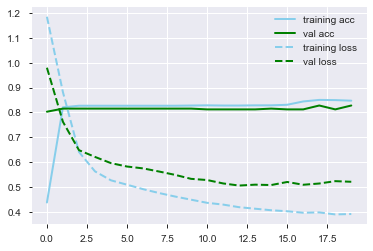

In [71]:
plt.plot( history.history['accuracy'], color='skyblue', linewidth=2, label='training acc')
plt.plot( history.history['val_accuracy'], color='green', linewidth=2, label='val acc')

plt.plot( history.history['loss'], color='skyblue', linewidth=2, linestyle='dashed', label="training loss")
plt.plot( history.history['val_loss'], color='green', linewidth=2, linestyle='dashed', label="val loss")
plt.legend()
